In [73]:
import math
import numpy as np
from graphviz import Digraph
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
def f(x):
    return 3*x**2 - 4*x + 5

In [75]:
f(3.0)

20.0

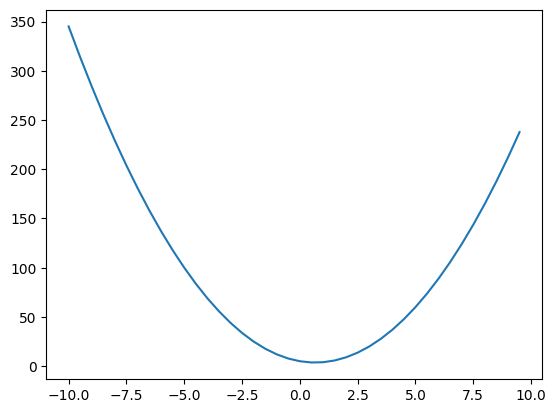

In [76]:
xs = np.arange(-10,10,0.5)
ys = f(xs)
plt.plot(xs,ys)
plt.show()

In [77]:
h = 0.000001
x = 2.5
(f(x+h) - f(x))/h

11.000003002692438

In [78]:
h = 0.000001

a = 2.0
b = -3.0
c = 10.0
d = a*b + c

In [79]:
d1 = a*b+c
c +=h
d2 = a*b+c

(d2-d1)/h

0.9999999992515995

In [80]:
class Value:
    def __init__(self,data,children=(),op='',label=''):
        self.data = data
        self._prev = set(children)
        self._op = op
        self.label = label
        self.grad = 0.0

    def __repr__(self):
        return f"Values=(data={self.data})"

    def __add__(self,other):
        out = Value(self.data+other.data,(self,other),'+')
        return out

    def __mul__(self,other):
        out = Value(self.data*other.data,(self,other),'*')
        return out

a = Value(2, label='a')
b = Value(-3, label='b')
c = Value(10, label='c')
e = a*b; e.label = 'e'
d = e+c; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'

In [81]:
L._prev

{Values=(data=-2.0), Values=(data=4)}

In [82]:
L._op

'*'

In [83]:
#Build the connections as nodes and edges between different nodes.
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)
    
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label= "{%s | data %.4f | grad %.4f}" %(n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=uid+n._op, label= n._op)
            dot.edge(uid+n._op,uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2))+n2._op)

    return dot

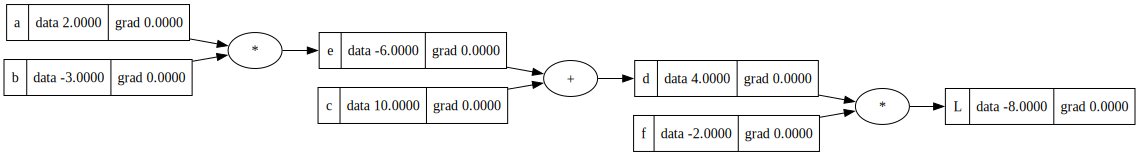

In [84]:
draw_dot(L)

In [85]:
#Manual Backprop understanding

In [101]:
def lol():

    h = 0.0001
    a = Value(2, label='a')
    b = Value(-3, label='b')
    c = Value(10, label='c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L1 = L.data

    a = Value(2, label='a')
    b = Value(-3, label='b')
    c = Value(10, label='c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    # d.data +=h
    f = Value(-2.0+h, label='f')
    L = d*f; L.label = 'L'
    L2 = L.data  
    print((L2-L1)/h)

lol()
    

3.9999999999995595


In [96]:
#dL/dL = 1.0 
L.grad = 1.0

In [99]:
#dL/dd = ?
# dL/dd = f
#Hence gradient of d becomes f that is; -2
# Similarly grad of f becomes d
d.grad = -2
f.grad = d.data

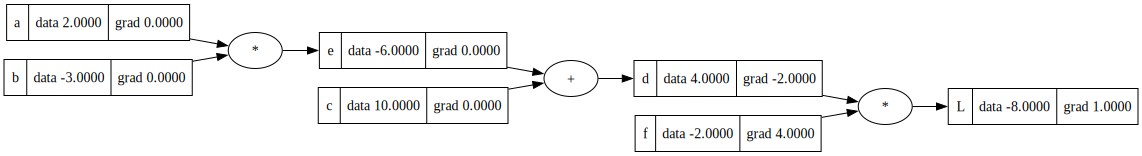

In [100]:
draw_dot(L)

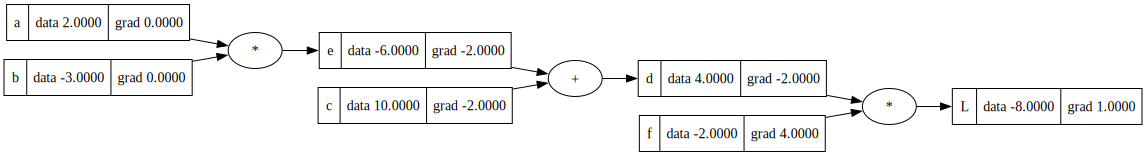

In [103]:
# dL/de =?
# de is dependent on d and L, Hence, chain rule.
#dL/de = DL/dd * dd/de
#dd/de = 1.0
# dL/de = DL/dd
e.grad = d.grad
#Similary dL/dc = dL/dd
c.grad = d.grad
draw_dot(L)

In [105]:
#dL/da = ?
# a is dependent on e.
#We have ; dL/de
#dL/da = dL/de * de/da
#We have dL/de, de/da = b;
a.grad = e.grad * b.data
#Similarly
b.grad = e.grad * a.data

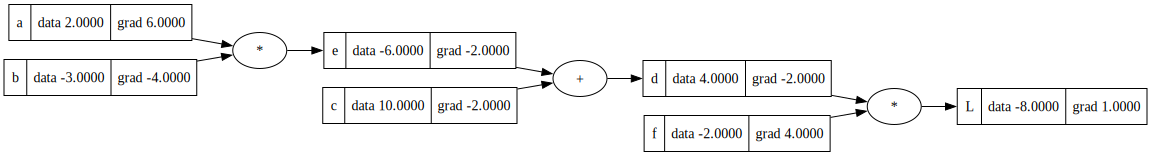

In [106]:
draw_dot(L)